In [1]:

from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

import prepare as pre

# GOALS
- classify the medical specialties based on the transcription text?

# Summary:
-
-


# Plan -> Acquire -> Prepare -> Explore -> Model -> Deliver

_________________

# Plan
I download a cvs file from this link 


____________

# Acquire

In [2]:
# read csv file
df = pd.read_csv('mtsamples.csv',  index_col=[0])

In [3]:
#check the first 5 observations
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
#check info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [5]:
#let's check description and transcription

In [6]:
df.description[0]

' A 23-year-old white female presents with complaint of allergies.'

In [7]:
df.transcription[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [8]:
df.transcription[1]

'PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor.  He exercises three times a week at home and does cardio.  He has difficulty walking two blocks or five flights of stairs.  Difficulty with snoring.  He has muscle and joint pains including knee pain, back pain, foot and ankle pain, and swelling.  He has gastroesophageal reflux disease.,PAST SURGICAL HISTORY:, Includes reconstructive surgery on his right hand 13 years ago.  ,SOCIAL HISTORY:, He is currently single.  He has about ten drinks a year.  He had smoked significantly up until several months ago.  He now smokes less than three cigarettes a day.,FAMILY HISTORY:, Heart disease in both grandfathers, grandmother with stroke, and a grandmother with diabetes.  Denies obesity and hypertension in other family members.,CURRENT MEDICATIONS:, None.,ALLERGIES:,  He is allergic to Penicillin.,MISCELLANEOUS/EATING HISTORY:, He has b

In [9]:
df.description[1]

' Consult for laparoscopic gastric bypass.'

In [10]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


**Note:**
- `description` is the chief complain or reason for thr visit. 
- `transcription` is the medical record for this visit'
- `medical_specialty` is the Medical specialty classification of transcription.
- `sample_name` Transcription title
- `keywords` Relevant keywords from transcription

# PREPARE

In [11]:
df.duplicated().sum()

0

## missing values

In [12]:
# using a function to check the missing values
pre.miss_dup_values(df)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
keywords,1068,21.4
transcription,33,0.7


In [13]:
#checking the rows that have null values in transcription
df[df.transcription.isnull()]

,description,medical_specialty,sample_name,transcription,keywords
97,Inguinal orchiopexy procedure.,Urology,Inguinal orchiopexy,NaN,"urology, inguinal orchiopexy, keith needles, a..."
116,Inguinal hernia hydrocele repair.,Urology,Hydrocele Repair,NaN,"urology, inguinal hernia, external oblique, he..."
205,Vaginal Hysterectomy. A weighted speculum wa...,Surgery,Vaginal Hysterectomy,NaN,"surgery, omentum, massachusetts, vaginal hyste..."
263,Total Abdominal Hysterectomy (TAH). An incis...,Surgery,Total Abdominal Hysterectomy,NaN,"surgery, fundus, double-toothed tenaculum, mus..."
459,Parotidectomy procedure,Surgery,Parotidectomy,NaN,"surgery, parotidectomy, mixter clamp, auditory..."
622,Laparoscopy. The cervix was grasped with a s...,Surgery,Laparoscopy - 1,NaN,"surgery, uterus, cervix, vaginal, single tooth..."
628,Laparoscopy. An incision was made in the umb...,Surgery,Laparoscopy - 2,NaN,"surgery, umbilicus, trocar, falope, laparoscop..."
680,Inguinal orchiopexy procedure.,Surgery,Inguinal orchiopexy,NaN,"surgery, inguinal orchiopexy, keith needles, a..."
729,Inguinal hernia hydrocele repair.,Surgery,Hydrocele Repair,NaN,"surgery, inguinal hernia, external oblique, he..."
871,Common description of EGD,Surgery,EGD Template - 4,NaN,"surgery, lateral supine position, stomach, duo..."


**I decided to removed transcription missing values, but I'm going to keep keyword**

- I'm going to fill missing valiues in keywords with the word none
- and then I'm going to remove missing values

In [14]:
#fill only keywords missing

In [15]:
df.keywords.fillna('none', inplace = True)

In [16]:
#checking again missing values
pre.miss_dup_values(df)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
transcription,33,0.7


In [17]:
#removing missing values
df = df.dropna(axis=0).reset_index(drop=True)

In [18]:
#checking again missing values
pre.miss_dup_values(df)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [19]:
# we don't have missing values

In [20]:
df.shape

(4966, 5)

Now lets see the different specialties

In [21]:
df.medical_specialty.value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [22]:
def top_n_target(df,target,  n):
    '''
    takes in a df and target and give you the top n of you target
    return a df with only the top n 
    '''
    
    #get the value counts of the target
    targ =pd.DataFrame(df[[target]].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':target})
    #get the top 5
    topl= list(targ.loc[0:(n-1)].medical_specialty.values)
    #get new df with only the top n values of target
    df= df[df.medical_specialty.isin(topl)].reset_index(drop=True)
    return  df

In [23]:
new_df =top_n_target(df[['medical_specialty', 'transcription']], 'medical_specialty', 5)

##  clean, tokenized, stemming, lemmatize

In [24]:

#use my prepare function
clean_df =pre.prepare_data(new_df, 'transcription')

In [25]:
clean_df.head()

,medical_specialty,transcription,clean,stemmed,lemmatized
0,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2d mmode 1 left atrial enlargement left atrial...,2d mmode 1 left atrial enlarg left atrial diam...,2d mmode 1 left atrial enlargement left atrial...
1,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,1 left ventricular cavity size wall thickness ...,1 left ventricular caviti size wall thick appe...,1 left ventricular cavity size wall thickness ...
2,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",2d echocardiogrammultiple views heart great ve...,2d echocardiogrammultipl view heart great vess...,2d echocardiogrammultiple view heart great ves...
3,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size....",description1 normal cardiac chambers size2 nor...,description1 normal cardiac chamber size2 norm...,description1 normal cardiac chamber size2 norm...
4,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc...",2d study1 mild aortic stenosis widely calcifie...,2d study1 mild aortic stenosi wide calcifi min...,2d study1 mild aortic stenosis widely calcifie...


In [26]:
clean_df.transcription[0]

'2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.'

In [27]:
clean_df.clean[0]

'2d mmode 1 left atrial enlargement left atrial diameter 47 cm2 normal size right left ventricle3 normal lv systolic function left ventricular ejection fraction 514 normal lv diastolic function5 pericardial effusion6 normal morphology aortic valve mitral valve tricuspid valve pulmonary valve7 pa systolic pressure 36 mmhgdoppler 1 mild mitral tricuspid regurgitation2 trace aortic pulmonary regurgitation'

In [28]:
clean_df.lemmatized[0]

'2d mmode 1 left atrial enlargement left atrial diameter 47 cm2 normal size right left ventricle3 normal lv systolic function left ventricular ejection fraction 514 normal lv diastolic function5 pericardial effusion6 normal morphology aortic valve mitral valve tricuspid valve pulmonary valve7 pa systolic pressure 36 mmhgdoppler 1 mild mitral tricuspid regurgitation2 trace aortic pulmonary regurgitation'

## checking main function

In [29]:
# read csv file
df = pd.read_csv('mtsamples.csv',  index_col=[0])

In [30]:

#prepare data
clean_df = pre.prepare_mf(df )

In [31]:
clean_df.head()

,medical_specialty,transcription,clean,stemmed,lemmatized
0,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2d mmode 1 left atrial enlargement left atrial...,2d mmode 1 left atrial enlarg left atrial diam...,2d mmode 1 left atrial enlargement left atrial...
1,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,1 left ventricular cavity size wall thickness ...,1 left ventricular caviti size wall thick appe...,1 left ventricular cavity size wall thickness ...
2,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",2d echocardiogrammultiple views heart great ve...,2d echocardiogrammultipl view heart great vess...,2d echocardiogrammultiple view heart great ves...
3,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size....",description1 normal cardiac chambers size2 nor...,description1 normal cardiac chamber size2 norm...,description1 normal cardiac chamber size2 norm...
4,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc...",2d study1 mild aortic stenosis widely calcifie...,2d study1 mild aortic stenosi wide calcifi min...,2d study1 mild aortic stenosis widely calcifie...


In [33]:
clean_df.medical_specialty.value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
Name: medical_specialty, dtype: int64

In [36]:
import matplotlib as mpl

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

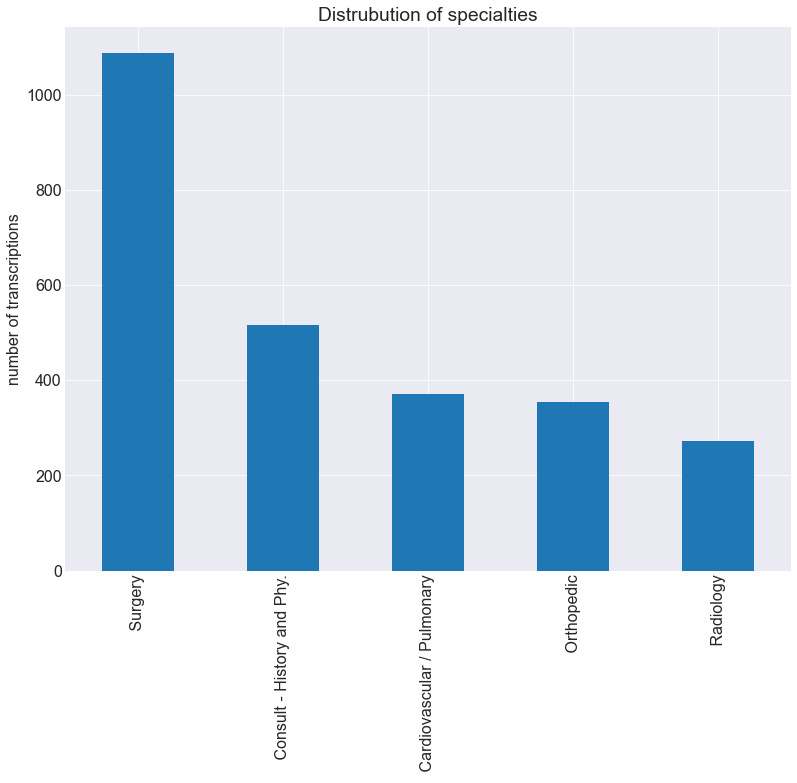

In [38]:
clean_df.medical_specialty.value_counts().plot.bar()
plt.title('Distrubution of specialties')
plt.ylabel('number of transcriptions')
plt.show()